# EEP 153: Project 3 Hazel Kyrk
## Food Demand in Uganda over Time Periods
##### **Time Frames**: 
* 2009-10
* 2015-16 
* 2019-20

##### **Goals**: 
 * Estimating an average demand system for each based on a calculated nutritionally adequete diet.
 * Compared estimated income elasticity for the food items for each of the three time periods using expenditure data for a range of food consumed across the country in differing households.
 * Calculated the total predicted expenditures for each household and finally charted the average predicted expenditures over time as well as the average food demand over time.


#### Project Setup

In [66]:
!pip3 install -r requirements.txt
!pip3 install -- pip
!pip install --upgrade openpyxl
!pip install openpyxl==3.1.0
!pip show openpyxl
!pip install --upgrade openpyxl
!pip show openpyxl
!pip install seaborn scikit-learn sqlalchemy


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached openpyxl-3.1.0-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.0-py2.py3-none-any.whl (250 kB)
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.2
    Uninstalling openpyxl-3.1.2:
      Successfully uninstalled openpyxl-3.1.2
Name: openpyxl
Version: 3.1.0
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /Users/neha/Library/Python/3.9/lib/python/site-packages
Requires: et-xmlfile
Required-by: 
Defaulting to user installation because normal site-packages is not writeable
 

#### Timeframe Data

In [67]:
import pandas as pd
import numpy as np
import cfe

file_path = "./Uganda.xlsx"

def prepare_data_for_year(year):
    # Load expenditures data for the given year
    x = pd.read_excel(file_path, sheet_name=f'Expenditures ({year})')
    x.columns.name = 'j'
    x['i'] = x['i'].astype(str)

    # Load prices data
    p = pd.read_excel(file_path, sheet_name='Prices').set_index(['t', 'm'])
    p.columns.name = 'j'
    # Adjust the year format as necessary to match your data
    p = p.xs(year, level='t')

    # Load household characteristics data
    d = pd.read_excel(file_path, sheet_name="HH Characteristics")
    d = d[d['t'] == year]

    d.columns.name = 'k'
    #d['i'] = pd.to_numeric(d['i'], errors='coerce')
    d['i'] = d['i'].astype(str)

    # Process expenditures data
    x = x.T.groupby('j').sum().T  # Sum over duplicate columns if any
    x = x.replace(0, np.nan)  # Replace zeros with missing
    y = np.log(x.set_index(['i', 't', 'm']))  # Log transform
    
    # Process household characteristics data
    d.set_index(['i', 't', 'm'], inplace=True)

    return y, d, p

# Preparing data for each year
y_2010, d_2010, p_2010 = prepare_data_for_year('2009-10')
y_2015, d_2015, p_2015 = prepare_data_for_year('2015-16')
y_2020, d_2020, p_2020 = prepare_data_for_year('2019-20')  # Adjust the year if your data uses a different convention


/var/folders/bt/c93z4q694gz68fwqnmd2h58r0000gn/T/ipykernel_11914/2827835615.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(0, np.nan)  # Replace zeros with missing
/var/folders/bt/c93z4q694gz68fwqnmd2h58r0000gn/T/ipykernel_11914/2827835615.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(0, np.nan)  # Replace zeros with missing
/var/folders/bt/c93z4q694gz68fwqnmd2h58r0000gn/T/ipykernel_11914/2827835615.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

In [68]:
print(y_2015.index)

MultiIndex([(  '1013000201', '2015-16', 'Central'),
            (  '1013000202', '2015-16', 'Central'),
            (  '1013000204', '2015-16', 'Central'),
            (  '1013000210', '2015-16', 'Central'),
            (  '1021000108', '2015-16', 'Central'),
            (  '1021000109', '2015-16', 'Central'),
            (  '1021000111', '2015-16', 'Central'),
            (  '1021000113', '2015-16', 'Central'),
            (  '1021000201', '2015-16', 'Central'),
            (  '1021000202', '2015-16', 'Central'),
            ...
            ('H43002-04-01', '2015-16', 'Western'),
            ('H43003-04-01', '2015-16', 'Western'),
            ('H43004-04-01', '2015-16', 'Western'),
            ('H43005-04-01', '2015-16', 'Western'),
            ('H43006-04-01', '2015-16', 'Western'),
            ('H43007-04-01', '2015-16', 'Western'),
            ('H43008-04-01', '2015-16', 'Western'),
            ('H43009-04-01', '2015-16', 'Western'),
            ('H43009-04-02', '2015-16', 'Western

In [69]:
print(d_2015.index)

MultiIndex([(  '1013000201', '2015-16', 'Central'),
            (  '1013000202', '2015-16', 'Central'),
            (  '1013000204', '2015-16', 'Central'),
            (  '1013000210', '2015-16', 'Central'),
            (  '1021000108', '2015-16', 'Central'),
            (  '1021000109', '2015-16', 'Central'),
            (  '1021000111', '2015-16', 'Central'),
            (  '1021000113', '2015-16', 'Central'),
            (  '1021000201', '2015-16', 'Central'),
            (  '1021000202', '2015-16', 'Central'),
            ...
            ('H43002-04-01', '2015-16', 'Western'),
            ('H43003-04-01', '2015-16', 'Western'),
            ('H43004-04-01', '2015-16', 'Western'),
            ('H43005-04-01', '2015-16', 'Western'),
            ('H43006-04-01', '2015-16', 'Western'),
            ('H43007-04-01', '2015-16', 'Western'),
            ('H43008-04-01', '2015-16', 'Western'),
            ('H43009-04-01', '2015-16', 'Western'),
            ('H43009-04-02', '2015-16', 'Western

In [70]:
y_2010

,,j,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,Cake,Cassava,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
1013000201,2009-10,Central,NaN,NaN,NaN,NaN,NaN,7.824046,NaN,NaN,NaN,8.699515,...,NaN,NaN,8.006368,NaN,6.214608,NaN,NaN,NaN,NaN,NaN
1013000204,2009-10,Central,NaN,NaN,NaN,NaN,NaN,7.313220,NaN,NaN,NaN,NaN,...,NaN,6.907755,NaN,NaN,6.907755,NaN,NaN,NaN,NaN,NaN
1013000206,2009-10,Central,NaN,NaN,NaN,NaN,NaN,8.006368,NaN,NaN,NaN,NaN,...,NaN,6.907755,NaN,3.912023,NaN,NaN,NaN,NaN,NaN,NaN
1013000210,2009-10,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101300021302,2009-10,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.600902,5.298317,6.214608,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193003506,2009-10,Western,9.729134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,NaN,NaN,NaN
4193003507,2009-10,Western,8.630522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4193003508,2009-10,Western,8.517193,8.853665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.313220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Prediction of Expenditure

In [71]:
def run_regression(y, d):
    # Ensure dataframes are aligned and prepared
    y = y.stack()  # Required for Regression
    d = d.stack()

    # Remove duplicate indexes
    idx = np.unique(d.index.values, return_index = True)[1]
    d = d.iloc[idx]

    print(y)
    print(d.shape)

    # Check indices are correctly aligned
    assert y.index.names == ['i', 't', 'm', 'j']
    assert d.index.names == ['i', 't', 'm', 'k']
    # Run the regression
    result = cfe.Regression(y=y, d=d)

    # Predict expenditures and perform other analysis as required
    predicted_expenditures = result.predicted_expenditures()

    return result, predicted_expenditures

In [72]:
result_2010, predicted_expenditures_2010 = run_regression(y_2010, d_2010)
result_2015, predicted_expenditures_2015 = run_regression(y_2015, d_2015)
result_2020, predicted_expenditures_2020 = run_regression(y_2020, d_2020)

i           t        m        j           
1013000201  2009-10  Central  Bread           7.824046
                              Cassava         8.699515
                              Coffee          4.605170
                              Cooking Oil     5.703782
                              Maize           7.090077
                                                ...   
4193003510  2009-10  Western  Milk (fresh)    9.190138
                              Onions          6.907755
                              Salt            6.214608
                              Tea             6.214608
                              Tomatoes        8.006368
Length: 36736, dtype: float64
(44610,)


i             t        m        j             
1013000201    2015-16  Central  Beans             8.006368
                                Beef              9.104980
                                Bread             7.600902
                                Cabbages          8.006368
                                Chapati           7.600902
                                                    ...   
H43010-04-01  2015-16  Western  Onions            6.907755
                                Other Fruits      8.517193
                                Salt              5.010635
                                Sweet Potatoes    8.699515
                                Tomatoes          6.214608
Length: 46812, dtype: float64
(49574,)
i                                 t        m         j           
00c9353d8ebe42faabf5919b81d7fae7  2019-20  Eastern   Beans           8.188689
                                                     Cabbages        7.244228
                                           

#### Income Elasticity

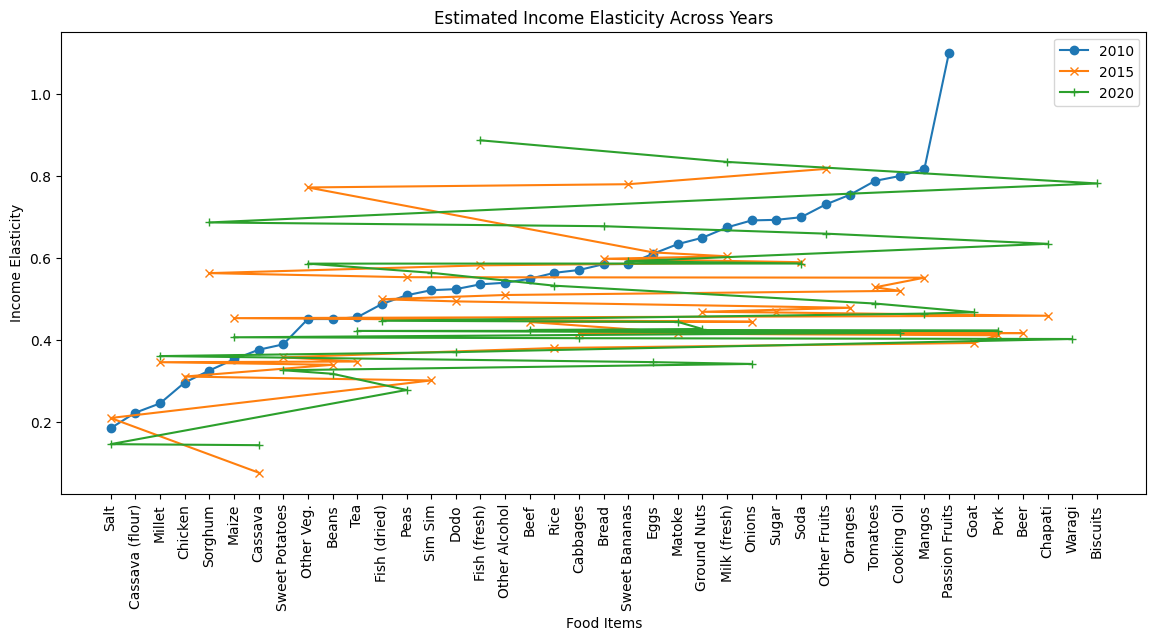

In [73]:
# Example: Comparing estimated income elasticity across years
beta_2010 = result_2010.get_beta().sort_values()
beta_2015 = result_2015.get_beta().sort_values()
beta_2020 = result_2020.get_beta().sort_values()

# You can print these values, or plot them for a visual comparison
# Example plot (ensure you have matplotlib installed)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(beta_2010, label='2010', marker='o')
plt.plot(beta_2015, label='2015', marker='x')
plt.plot(beta_2020, label='2020', marker='+')
plt.legend()
plt.title('Estimated Income Elasticity Across Years')
plt.xlabel('Food Items')
plt.ylabel('Income Elasticity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


#### Predicted Expenditures across Time Frames

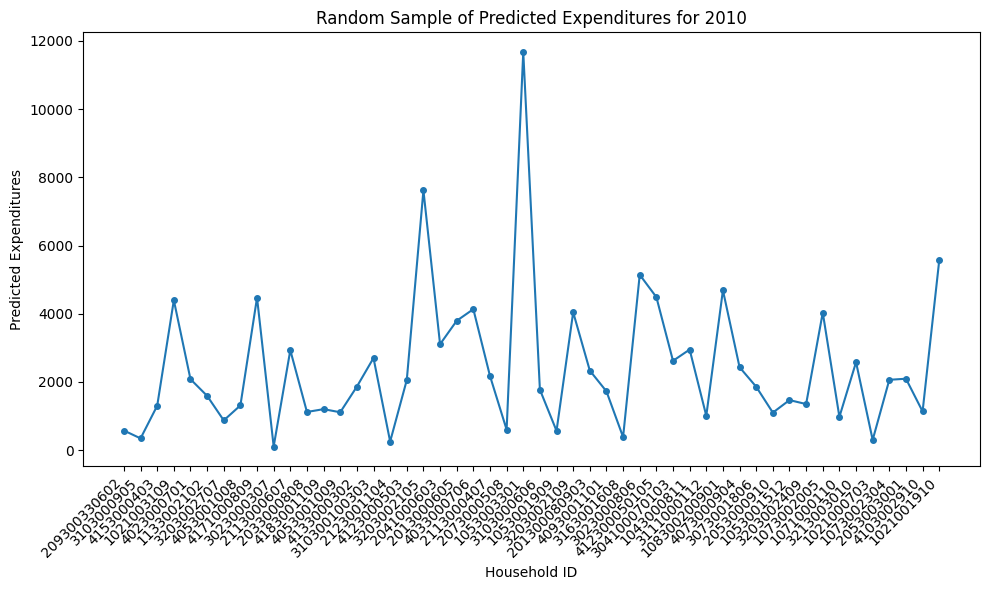

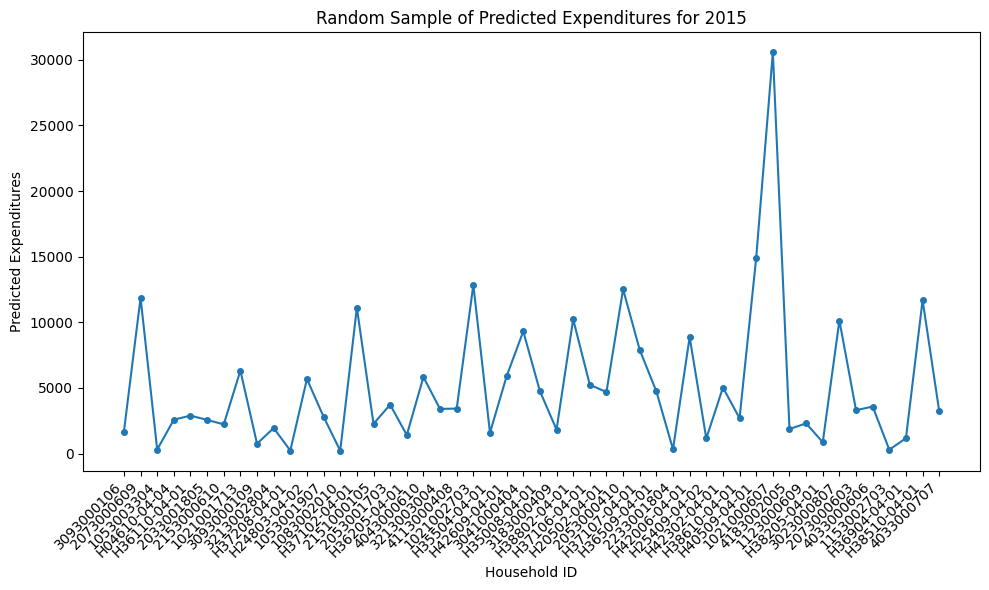

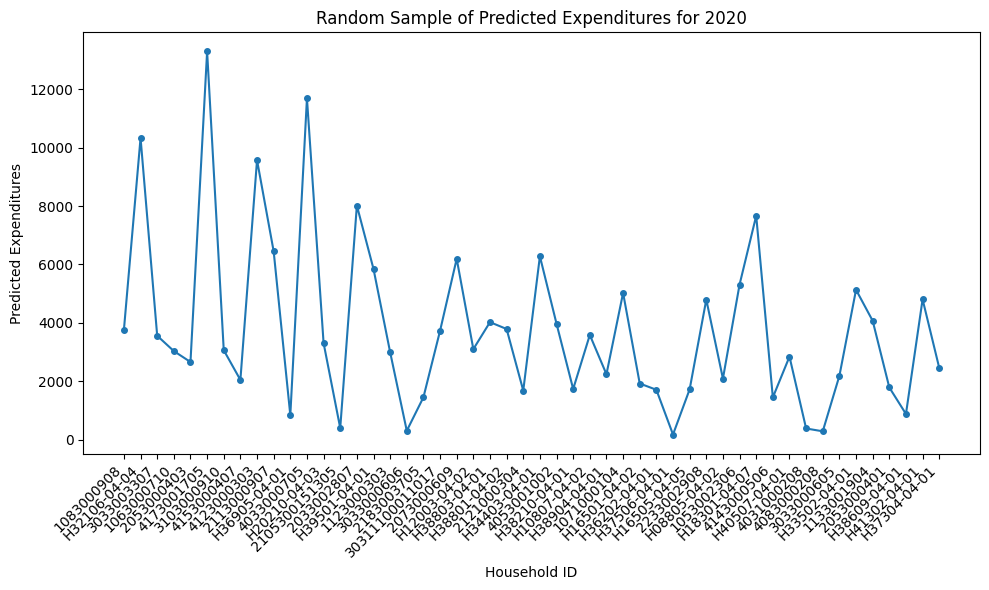

In [74]:
def plot_predicted_expenditures(predicted_expenditures, year, title):
    plt.figure(figsize=(10, 6))
    
    # Sample 50 random rows from the predicted expenditures DataFrame
    sample_predicted_expenditures = predicted_expenditures.sample(50)
    
    # Plot the sampled predicted expenditures
    plt.plot(sample_predicted_expenditures.index.get_level_values('i'), 
             sample_predicted_expenditures.values, 
             'o', linestyle='-', markersize=4)
    
    plt.title(title)
    plt.xlabel('Household ID')
    plt.ylabel('Predicted Expenditures')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting predicted expenditures for each year with 50 random households
plot_predicted_expenditures(predicted_expenditures_2010, year='2010', title='Random Sample of Predicted Expenditures for 2010')
plot_predicted_expenditures(predicted_expenditures_2015, year='2015', title='Random Sample of Predicted Expenditures for 2015')
plot_predicted_expenditures(predicted_expenditures_2020, year='2020', title='Random Sample of Predicted Expenditures for 2020')


#### Predicted Expenditures Compared

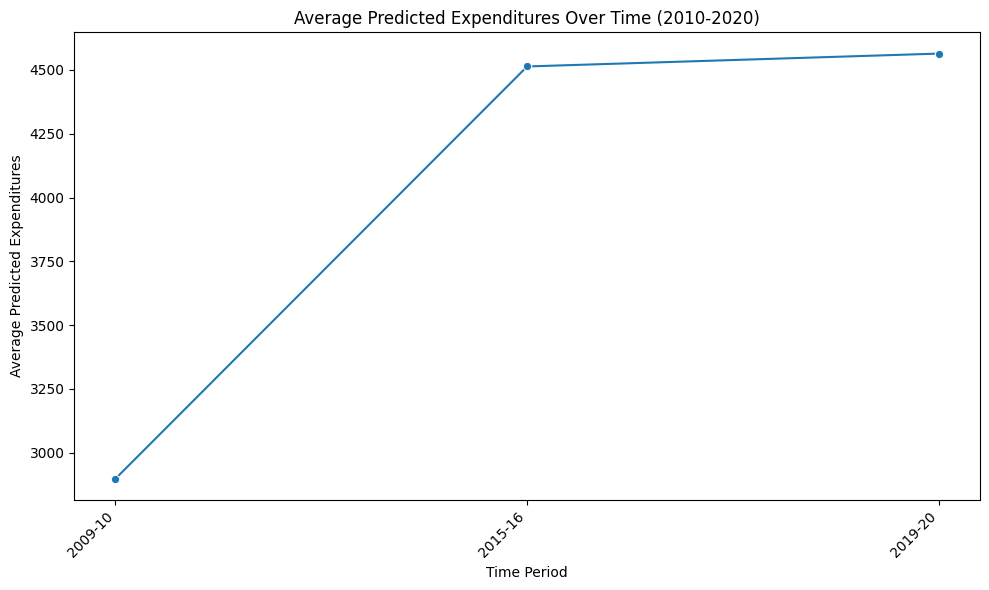

In [75]:
import seaborn as sns

# Combine predicted expenditures for all years into one DataFrame
predicted_expenditures_all = pd.concat([predicted_expenditures_2010, predicted_expenditures_2015, predicted_expenditures_2020])

# Calculate average predicted expenditures over time periods for all years
avg_expenditures_all = predicted_expenditures_all.groupby(level='t').mean().reset_index()

# Plotting average predicted expenditures over time periods for all years
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_expenditures_all, x='t', y=0, marker='o')
plt.title('Average Predicted Expenditures Over Time (2010-2020)')
plt.xlabel('Time Period')
plt.ylabel('Average Predicted Expenditures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


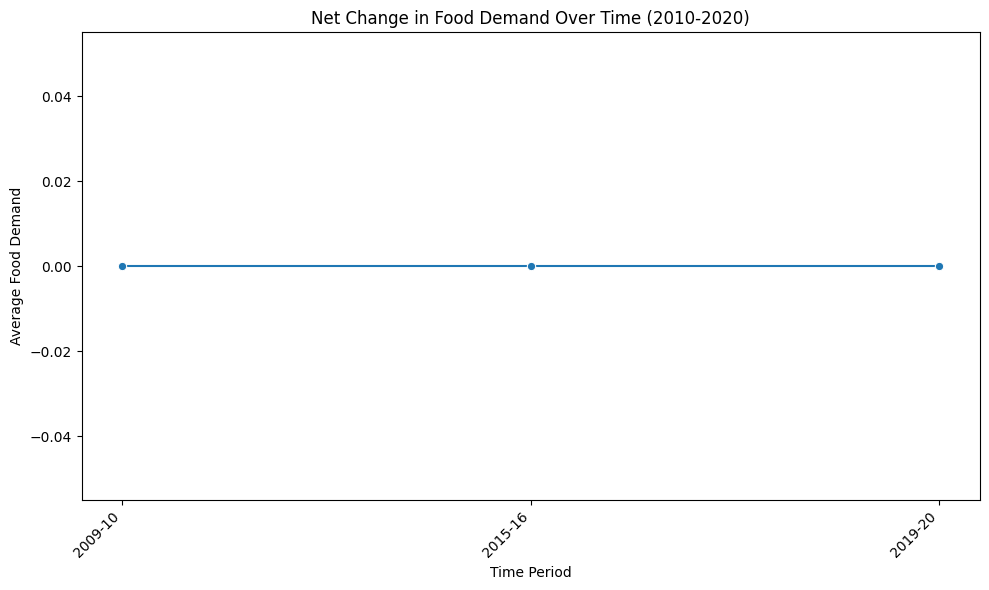

In [76]:
# Combine food demand (predicted expenditures) for all years into one DataFrame
y_all = pd.concat([y_2010, y_2015, y_2020])

# Calculate average food demand over time periods for all years
avg_demand_all = y_all.groupby(level='t').mean().reset_index()

# Plotting average food demand over time periods for all years
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_demand_all, x='t', y=0, marker='o')
plt.title('Net Change in Food Demand Over Time (2010-2020)')
plt.xlabel('Time Period')
plt.ylabel('Average Food Demand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Engel Curve

In [77]:
p = pd.read_excel(file_path, sheet_name='Prices').set_index(['t', 'm'])
p = p.fillna(0)

In [78]:
p.head()

Beans  Beef    Beer  Biscuits  Bongo   Bread  \
t       m                                                              
2005-06 Central    650.000000  2500  3000.0       0.0    0.0  1400.0   
2005-6  Eastern    550.000000  2400  2000.0       0.0    0.0  1000.0   
        Northern   434.151414  2500  2400.0       0.0    0.0  1000.0   
        Western    500.000000  2200  2500.0       0.0    0.0  1000.0   
2009-10 Central   1350.000000  5000  4000.0       0.0    0.0  2400.0   

                  Butter, etc.  Cabbages  Cake  Cassava  ...  Sugarcane  \
t       m                                                ...              
2005-06 Central         3000.0    1400.0   0.0    500.0  ...        0.0   
2005-6  Eastern         3300.0    1050.0   0.0    500.0  ...        0.0   
        Northern        1500.0    1225.0   0.0    300.0  ...        0.0   
        Western         3000.0    1050.0   0.0    500.0  ...        0.0   
2009-10 Central         4800.0    1750.0   0.0   1000.0  ...        0.0   

                  Sweet Bananas  Sweet Potatoes     Tea  Tomatoes  Waragi  \
t       m                                                                   
2005-06 Central       54.054054           750.0   800.0     100.0     0.0   
2005-6  Eastern       40.000000           200.0   800.0     100.0     0.0   
        Northern      43.243243           200.0   800.0     100.0     0.0   
        Western       41.621622           200.0  1000.0     200.0     0.0   
2009-10 Central      108.108108          1000.0   800.0     300.0     0.0   

                  Water  Wheat (flour)  Yam  Yogurt  
t       m                                            
2005-06 Central     0.0            0.0  0.0     0.0  
2005-6  Eastern     0.0            0.0  0.0     0.0  
        Northern    0.0            0.0  0.0     0.0  
        Western     0.0            0.0  0.0     0.0  
2009-10 Central     0.0            0.0  0.0     0.0  

[5 rows x 74 columns]

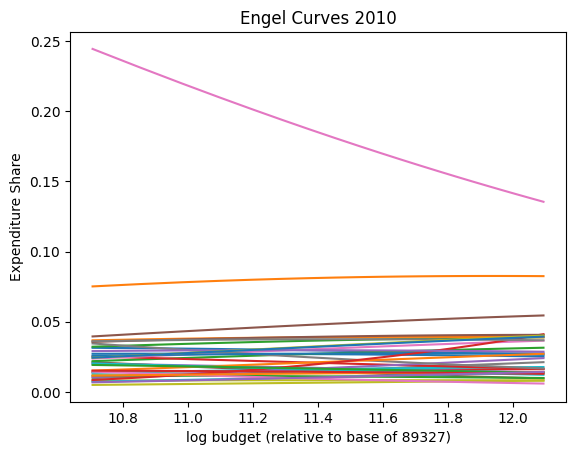

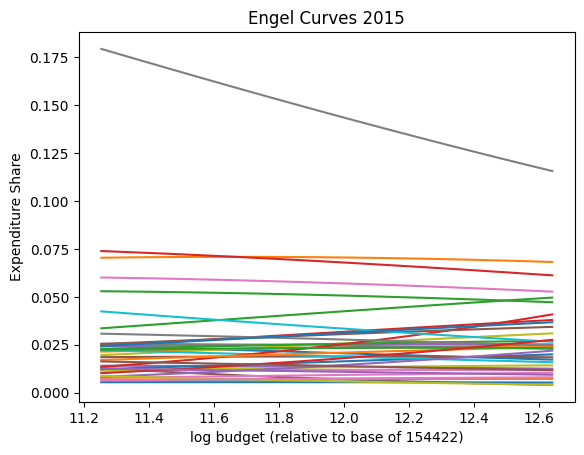

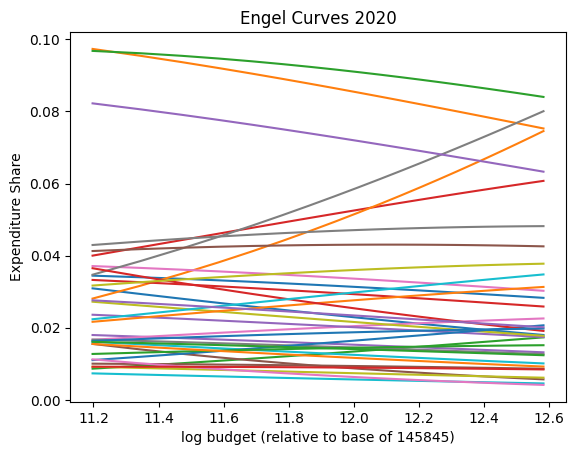

In [79]:
def plot_engel_curve(result, p, year, desired_foods = ['All']):
    '''
    Description
    --------------------------------------------------
    This function plots an engel curve for a given
    food.

    Inputs
    --------------------------------------------------
    + result : cfe regression; contains the regression
            object for the specified model above
    + p : pandas dataframe; contains the
            prices of all foods of interest across 
            different years
    + desired_foods : list; the food(s) for which an
            engel curve should be plotted, set to 
            'All' foods by default
    
    Outputs
    --------------------------------------------------
    + Plots the engel curve
    '''
    fig,ax = plt.subplots()
    
    xhat = result.predicted_expenditures()

    xbar = xhat.groupby(['i','t','m']).sum()

    ### Reference budget
    xref = xbar.quantile(0.5)  # 0.5 ==> median
    
    ### Prices per kilogram:
    pbar = p.mean()
    pbar = pbar[result.beta.index]

    # Vary prices from 50% to 200% of reference.
    scale = np.linspace(.5,2,20)
    try:
        ax.plot(np.log(scale * xref),
                [(result.expenditures(s * xref, pbar)/(s * xref)).loc[desired_foods] for s in scale])
        
    except:
        ax.plot(np.log(scale * xref),[result.expenditures(s * xref, pbar)/(s * xref) for s in scale])

    ax.set_xlabel(f'log budget (relative to base of {xref:.0f})')
    ax.set_ylabel(f'Expenditure Share')
    ax.set_title('Engel Curves ' + str(year))
    plt.show();  


plot_engel_curve(result_2010, p, 2010, ['All'])
plot_engel_curve(result_2015, p, 2015, ['All'])
plot_engel_curve(result_2020, p, 2020, ['All'])

#### Nutrional Adequacy

In [ ]:
nutritional_data = pd.read_excel(file_path, sheet_name='FCT')

nutritional_requirements = pd.read_excel(file_path, sheet_name='RDI')

price_data = pd.read_excel(file_path, sheet_name='Prices')

if isinstance(predicted_expenditures_2015, pd.Series):
    predicted_expenditures_2015 = predicted_expenditures_2015.to_frame('expenditure')

if 'level_0' in predicted_expenditures_2015.index.names:
    predicted_expenditures_2015.reset_index(level='level_0', drop=True, inplace=True)

if 'food_item' not in predicted_expenditures_2015.columns:
    predicted_expenditures_2015['food_item'] = predicted_expenditures_2015.index

predicted_expenditures_2015.reset_index(drop=True, inplace=True)

price_data_long = price_data.melt(id_vars=['t', 'm'], var_name='j', value_name='price')

predicted_expenditures_2015_with_prices = pd.merge(
    predicted_expenditures_2015, 
    price_data_long, 
    left_on=['food_item'], 
    right_on=['j'], 
    how='left'
)

predicted_expenditures_2015_with_prices['quantity'] = predicted_expenditures_2015_with_prices['expenditure'] / predicted_expenditures_2015_with_prices['price']

nutrient_intake_with_quantities = pd.merge(
    predicted_expenditures_2015_with_prices, 
    nutritional_data, 
    on='j', 
    how='left'
)

def calculate_nutritional_adequacy(nutrient_intake_with_quantities, nutritional_requirements):
    for nutrient in nutritional_requirements.columns:
        if nutrient not in ['j', 'price', 'expenditure', 'quantity']:  # Exclude non-nutrient columns
            nutrient_intake_with_quantities[nutrient] = nutrient_intake_with_quantities['quantity'] * nutrient_intake_with_quantities[nutrient]

    nutrient_columns = nutritional_requirements.columns.drop('j')
    total_nutrient_intake = nutrient_intake_with_quantities.groupby('i')[nutrient_columns].sum()

    adequacy = total_nutrient_intake >= nutritional_requirements.set_index('j')

    adequacy_proportions = adequacy.mean()

    return adequacy_proportions

nutritional_adequacy = calculate_nutritional_adequacy(nutrient_intake_with_quantities, nutritional_requirements)

print(nutritional_adequacy)